# projet 1: classification iris


## 1.Importation des Bibliothèques 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## 2.Chargement des Données et Exploration : 

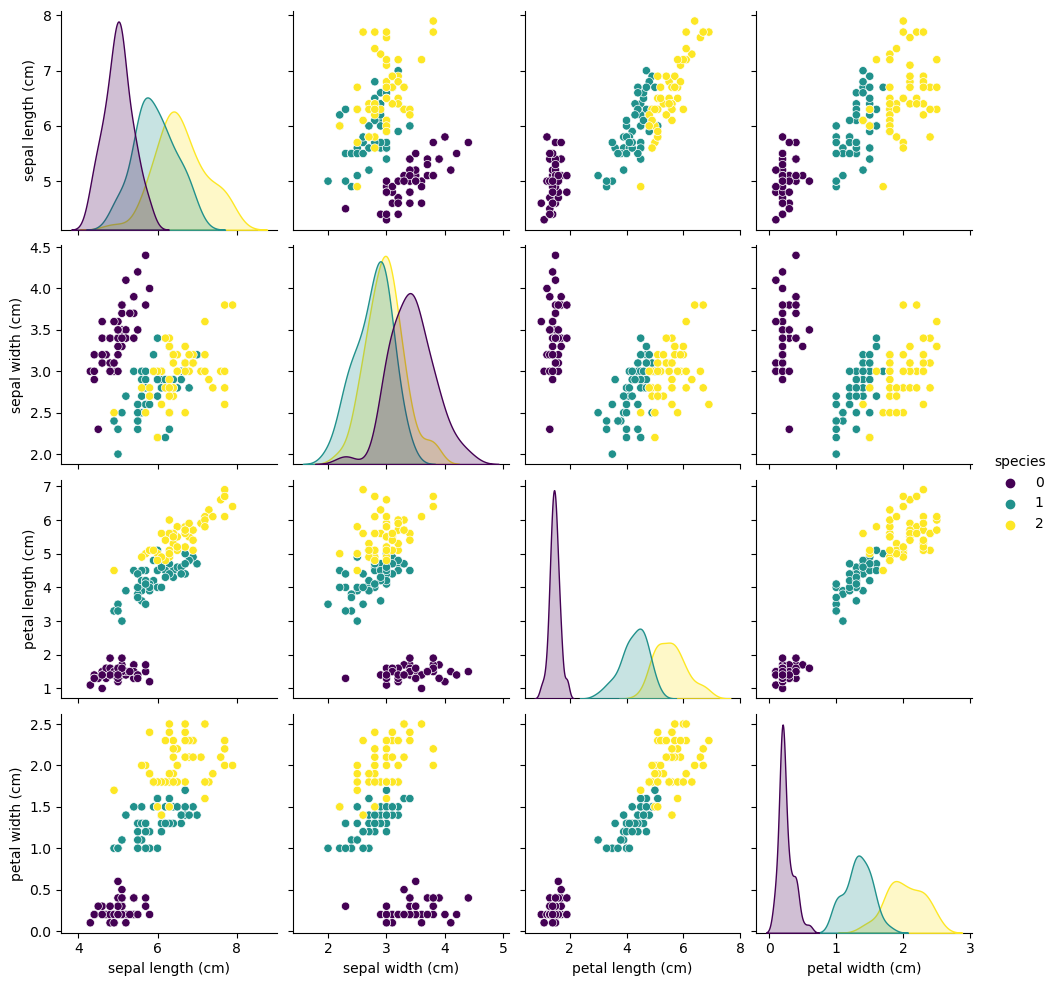

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

# Conversion des données en DataFrame pour une meilleure manipulation
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = iris.target

# Visualisation des relations entre les caractéristiques
sns.pairplot(iris_df, hue='species', palette='viridis')
plt.show()

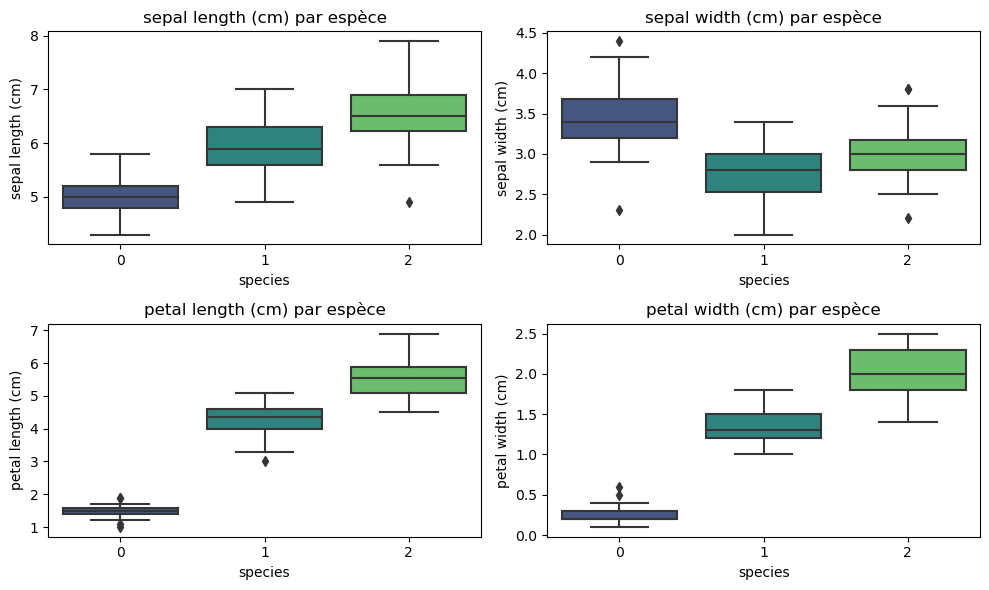

In [3]:
# Création des boîtes à moustaches pour chaque caractéristique en fonction de l'espèce
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris_df, palette='viridis')
    plt.title(f'{feature} par espèce')
plt.tight_layout()
plt.show()

# 3.Division des Données 

In [4]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4.Entraînement du Modèle 

In [5]:
# Entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# 5.Prédiction et Évaluation

# Prédire les labels sur l'ensemble de test


In [6]:
y_pred = model.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)

# Afficher la précision
print("Précision :", accuracy)

Précision : 1.0


# projet 2: Reconnaissance de caractères



## Importation des Bibliothèques 

In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
import numpy as np 
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


## Chargement des Données et Exploration : 

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


The image wee see is 2


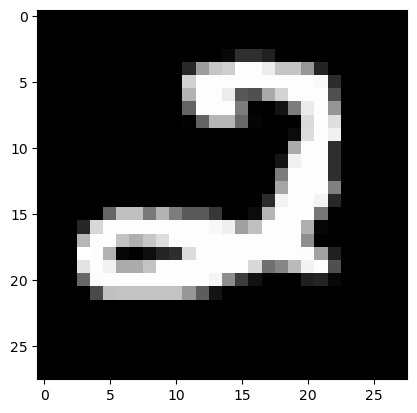

In [41]:
idx = random.randint(0,X_train.shape[0]-1)
img2show, label = X_train[idx],y_train[idx]
print(f'The image wee see is {label}')
plt.imshow(img2show, cmap='gray')

## preparation des donnes

In [42]:
X_train, X_test = X_train.reshape(-1, 28*28), X_test.reshape(-1, 28*28)
y_train, y_test=tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)
X_train, X_test = X_train/255.0, X_test/255.0

## construction de model 

In [ ]:
# model = Sequential()
model.add(Dense(784, activation='relu', input_shape = (784,)))
model.add(Dense(36, activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

## compile model


In [45]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

## entrainment de model

In [46]:
model.fit(X_train, y_train, epochs=20, batch_size=36, validation_data=(X_test, y_test))

Epoch 1/20


1667/1667 [==============================] - 5s 2ms/step - loss: 0.6043 - accuracy: 0.8410 - val_loss: 0.3077 - val_accuracy: 0.9154
Epoch 2/20
1667/1667 [==============================] - 4s 2ms/step - loss: 0.2846 - accuracy: 0.9186 - val_loss: 0.2454 - val_accuracy: 0.9304
Epoch 3/20
1667/1667 [==============================] - 4s 2ms/step - loss: 0.2317 - accuracy: 0.9341 - val_loss: 0.2092 - val_accuracy: 0.9424
Epoch 4/20
1667/1667 [==============================] - 4s 2ms/step - loss: 0.1967 - accuracy: 0.9440 - val_loss: 0.1956 - val_accuracy: 0.9443
Epoch 5/20
1667/1667 [==============================] - 4s 2ms/step - loss: 0.1707 - accuracy: 0.9512 - val_loss: 0.1640 - val_accuracy: 0.9528
Epoch 6/20
1667/1667 [==============================] - 4s 3ms/step - loss: 0.1501 - accuracy: 0.9580 - val_loss: 0.1477 - val_accuracy: 0.9586
Epoch 7/20
1667/1667 [==============================] - 4s 3ms/step - loss: 0.1338 - accuracy: 0.9619 - val_loss: 0.1341 - val_accurac

In [47]:
idx_test = random.randint(0, X_test.shape[0]-1)
img_test = X_test[idx_test]
img_test = np.expand_dims(img_test, axis=0)
prediction = model.predict(img_test)
predict_label = np.argmax(prediction)
true_label = y_test[idx_test]
print(f'The predicted label is {predict_label} and the true label is {np.argmax(true_label)}')

1/1 [==============================] - 0s 71ms/step
The predicted label is 2 and the true label is 2


In [48]:
prediction
true_label

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Projet 2: classification de texte

## importer les bibliothèques nécessaires :

In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.datasets import imdb


## preparation  de code

In [60]:
vocab_size = 10000
max_length = 150
trunc_type = 'post'
padding_type = 'post'


(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)
X_train = pad_sequences(X_train, maxlen = max_length, padding = padding_type, truncating = trunc_type)
X_test = pad_sequences(X_test, maxlen = max_length, padding = padding_type, truncating = trunc_type)

## construction de model

In [61]:
embedding_dim = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(32))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## compile model


In [62]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## entrainement model 

In [63]:
num_epochs = 10
model.fit(X_train, y_train, epochs = num_epochs, validation_data = (X_test, y_test))

Epoch 1/10
782/782 [==============================] - 33s 40ms/step - loss: 0.4939 - accuracy: 0.7464 - val_loss: 0.3898 - val_accuracy: 0.8258
Epoch 2/10
782/782 [==============================] - 31s 39ms/step - loss: 0.3073 - accuracy: 0.8830 - val_loss: 0.3875 - val_accuracy: 0.8375
Epoch 3/10
782/782 [==============================] - 30s 39ms/step - loss: 0.2426 - accuracy: 0.9099 - val_loss: 0.4017 - val_accuracy: 0.8176
Epoch 4/10
782/782 [==============================] - 30s 38ms/step - loss: 0.1979 - accuracy: 0.9300 - val_loss: 0.4300 - val_accuracy: 0.8312
Epoch 5/10
782/782 [==============================] - 30s 38ms/step - loss: 0.1584 - accuracy: 0.9456 - val_loss: 0.5285 - val_accuracy: 0.8262
Epoch 6/10
782/782 [==============================] - 29s 38ms/step - loss: 0.1421 - accuracy: 0.9522 - val_loss: 0.5127 - val_accuracy: 0.8225
Epoch 7/10
782/782 [==============================] - 30s 39ms/step - loss: 0.1270 - accuracy: 0.9575 - val_loss: 0.5793 - val_accuracy:

## evolution

In [64]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

782/782 [==============================] - 7s 9ms/step - loss: 0.7063 - accuracy: 0.8223
Loss: 0.7062787413597107, Accuracy: 0.8222799897193909
